In [1]:
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html
## scipy.interpolate.splrep
## scipy.interpolate.splrep(x, y, w=None, xb=None, xe=None, k=3, task=0, s=None, t=None, full_output=0, per=0, quiet=1)[source]
## Find the B-spline representation of a 1-D curve.
## 
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html
## scipy.interpolate.splev
## scipy.interpolate.splev(x, tck, der=0, ext=0)[source]
## Evaluate a B-spline or its derivatives.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html
from scipy.interpolate import interp1d

# https://stackoverflow.com/questions/45179024/scipy-bspline-fitting-in-python
from scipy.interpolate import BSpline, make_interp_spline

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.make_interp_spline.html#scipy.interpolate.make_interp_spline
# https://stackoverflow.com/questions/45179024/scipy-bspline-fitting-in-python
#from scipy.interpolate import BSpline
from scipy.interpolate import splrep, splev

# https://qiita.com/Ken227/items/aee6c82ec6bab92e6abf
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html
from scipy.interpolate import splprep

In [3]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html

In [4]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

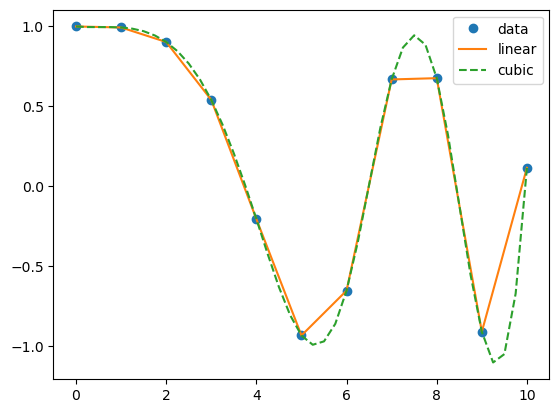

In [5]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [6]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.make_interp_spline.html#scipy.interpolate.make_interp_spline

In [7]:
def cheb_nodes(N):
    jj = 2.*np.arange(N) + 1
    x = np.cos(np.pi * jj / 2 / N)[::-1]
    return x

In [8]:
x = cheb_nodes(20)
y = np.sqrt(1 - x**2)

In [9]:
b = make_interp_spline(x, y)
np.allclose(b(x), y)

True

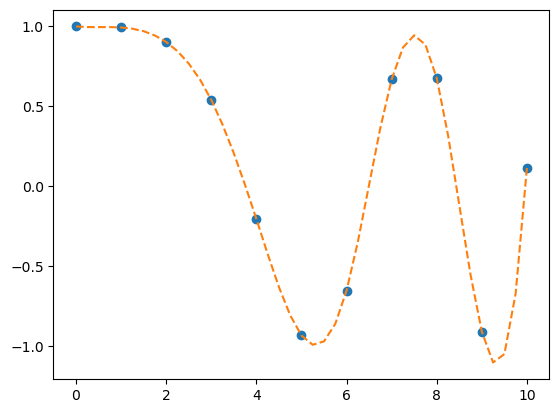

In [10]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f2 = make_interp_spline(x, y)

xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f2(xnew), '--')
plt.show()

In [11]:
# https://stackoverflow.com/questions/45179024/scipy-bspline-fitting-in-python

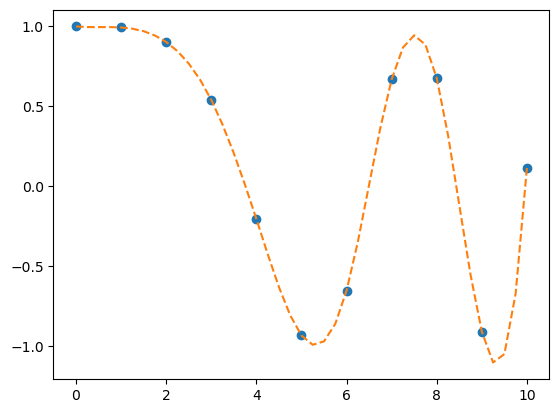

In [12]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
t, c, k = splrep(x, y, s=0, k=3)
f3 = BSpline(t, c, k, extrapolate=False)

xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f3(xnew), '--')
plt.show()

In [13]:
# https://stackoverflow.com/questions/45179024/scipy-bspline-fitting-in-python
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html

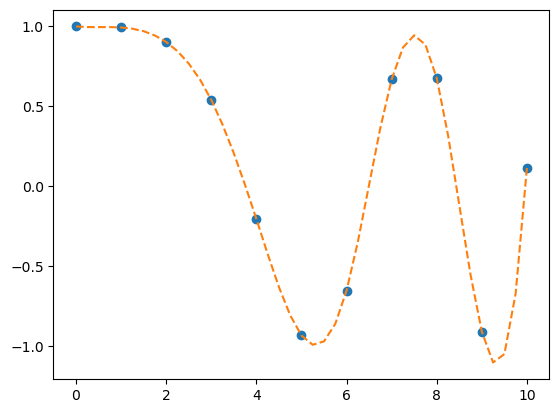

In [14]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
tck = splrep(x, y, s=0, k=3)
xnew = np.linspace(0, 10, num=41, endpoint=True)
f4 = splev(xnew, tck)

plt.plot(x, y, 'o')
plt.plot(xnew, f4, '--')
plt.show()

In [15]:
# https://qiita.com/Ken227/items/aee6c82ec6bab92e6abf
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html

[2.72686965e-17 3.12266067e-01 6.26508686e-01 9.41641171e-01
 1.25657684e+00 1.57022899e+00 1.88151095e+00 2.18924360e+00
 2.49095173e+00 2.78320511e+00 3.06256362e+00 3.32745280e+00
 3.58014143e+00 3.82337219e+00 4.05990986e+00 4.29505725e+00
 4.53897576e+00 4.80237525e+00 5.09574208e+00 5.41402810e+00
 5.72679937e+00 6.00127795e+00 6.21503725e+00 6.38641207e+00
 6.54376908e+00 6.71547494e+00 6.92989634e+00 7.21067929e+00
 7.53683720e+00 7.86280775e+00 8.14434407e+00 8.36732428e+00
 8.54474654e+00 8.69057719e+00 8.81878259e+00 8.94332907e+00
 9.07818299e+00 9.23731070e+00 9.43467854e+00 9.68425286e+00
 1.00000000e+01]
[ 1.          0.99485837  0.99512534  0.99453691  0.98682909  0.96573787
  0.92499928  0.85867565  0.76540552  0.6471994   0.50614319  0.34386158
  0.16102904 -0.04179709 -0.26397592 -0.49526524 -0.70704312 -0.86861278
 -0.94949243 -0.93414301 -0.8314441  -0.65253    -0.41155218 -0.13454307
  0.14954086  0.41174313  0.62310729  0.756104    0.79669711  0.73828015
  0.5754

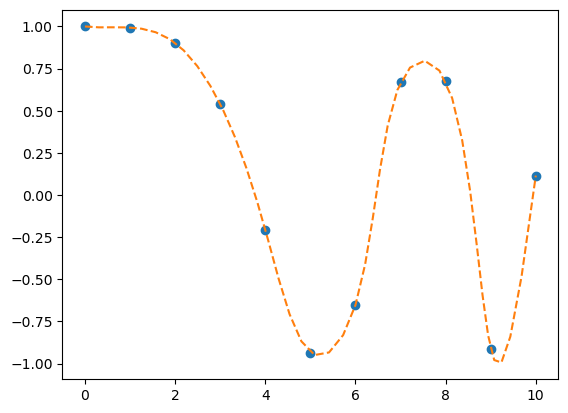

In [16]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
tck, _ = splprep([x, y], s=0, k=3) ## not splrep
u = np.linspace(0,1,num=41,endpoint=True)
f5_x, f5_y = splev(u, tck)
print(f5_x)
print(f5_y)

plt.plot(x, y, 'o')
plt.plot(f5_x, f5_y, '--')
plt.show()

In [17]:
# compare

xnew [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]
f5_x [2.72686965e-17 3.12266067e-01 6.26508686e-01 9.41641171e-01
 1.25657684e+00 1.57022899e+00 1.88151095e+00 2.18924360e+00
 2.49095173e+00 2.78320511e+00 3.06256362e+00 3.32745280e+00
 3.58014143e+00 3.82337219e+00 4.05990986e+00 4.29505725e+00
 4.53897576e+00 4.80237525e+00 5.09574208e+00 5.41402810e+00
 5.72679937e+00 6.00127795e+00 6.21503725e+00 6.38641207e+00
 6.54376908e+00 6.71547494e+00 6.92989634e+00 7.21067929e+00
 7.53683720e+00 7.86280775e+00 8.14434407e+00 8.36732428e+00
 8.54474654e+00 8.69057719e+00 8.81878259e+00 8.94332907e+00
 9.07818299e+00 9.23731070e+00 9.43467854e+00 9.68425286e+00
 1.00000000e+01]


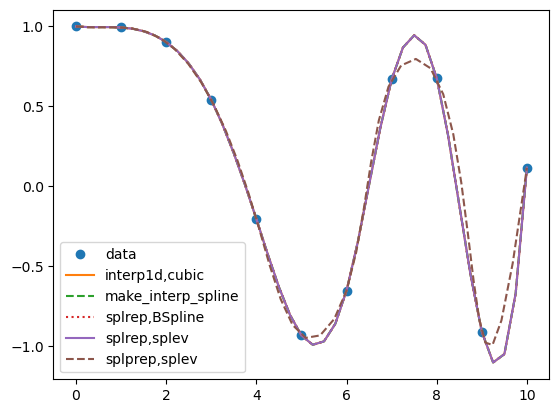

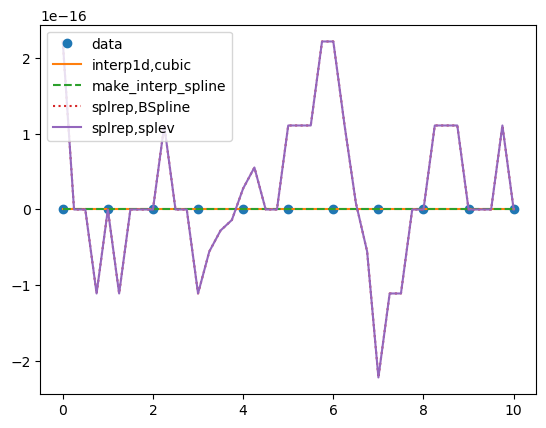

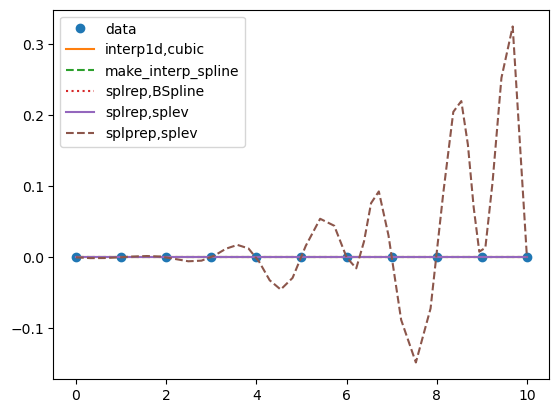

In [18]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
xnew = np.linspace(0, 10, num=41, endpoint=True)

## case1
f1 = interp1d(x, y, kind='cubic')

## case2
f2 = make_interp_spline(x, y)

## case3
t, c, k = splrep(x, y, s=0, k=3)
f3 = BSpline(t, c, k, extrapolate=False)

## case4
tck = splrep(x, y, s=0, k=3)
f4 = splev(xnew, tck)

## case 5 --> different from cases 1--4
tck, _ = splprep([x, y], s=0, k=3) ## not splrep
u = np.linspace(0,1,num=41,endpoint=True)
f5_x, f5_y = splev(u, tck)
print("xnew",xnew)
print("f5_x",f5_x)

plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-')
plt.plot(xnew, f2(xnew), '--')
plt.plot(xnew, f3(xnew), ':')
plt.plot(xnew, f4, '-')
plt.plot(f5_x, f5_y, '--')
plt.legend(['data', 'interp1d,cubic', 'make_interp_spline', 'splrep,BSpline', 'splrep,splev', 'splprep,splev'], loc='best')
plt.show()

plt.plot(x, y-y, 'o')
plt.plot(xnew, f1(xnew)-f1(xnew), '-')
plt.plot(xnew, f2(xnew)-f1(xnew), '--')
plt.plot(xnew, f3(xnew)-f1(xnew), ':')
plt.plot(xnew, f4-f1(xnew), '-')
plt.legend(['data', 'interp1d,cubic', 'make_interp_spline', 'splrep,BSpline', 'splrep,splev'], loc='best')
plt.show()

plt.plot(x, y-y, 'o')
plt.plot(xnew, f1(xnew)-f1(xnew), '-')
plt.plot(xnew, f2(xnew)-f1(xnew), '--')
plt.plot(xnew, f3(xnew)-f1(xnew), ':')
plt.plot(xnew, f4-f1(xnew), '-')
plt.plot(f5_x, f5_y-f1(f5_x), '--')
plt.legend(['data', 'interp1d,cubic', 'make_interp_spline', 'splrep,BSpline', 'splrep,splev', 'splprep,splev'], loc='best')
plt.show()